In [30]:
from pyinform.transferentropy import transfer_entropy
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
feelings = ['MetaAwareness','Presence','PhysicalEffort','MentalEffort','Boredom', 'Receptivity', 'EmotionalIntensity', 'Clarity', 'Release', 'Bliss', 'Embodiment', 'Insightfulness', 'Anxiety', 'SpiritualExperience']
feelings_diffs = ['MetaAwareness_diff', 'Presence_diff', 'PhysicalEffort_diff',
       'MentalEffort_diff', 'Boredom_diff', 'Receptivity_diff',
       'EmotionalIntensity_diff', 'Clarity_diff', 'Release_diff', 'Bliss_diff',
       'Embodiment_diff', 'Insightfulness_diff', 'Anxiety_diff',
       'SpiritualExperience_diff']

In [22]:
data = pd.read_csv('c:/Users/hugma/diss/data/differences_array_transitions.csv')
data.columns

Index(['Subject', 'Week', 'Session', 'Condition', 'MetaAwareness', 'Presence',
       'PhysicalEffort', 'MentalEffort', 'Boredom', 'Receptivity',
       'EmotionalIntensity', 'Clarity', 'Release', 'Bliss', 'Embodiment',
       'Insightfulness', 'Anxiety', 'SpiritualExperience', 'fo_lzsum',
       'ff_lzsum', 'oo_lzsum', 'global_lzsum', 'fo_lzc', 'ff_lzc', 'oo_lzc',
       'global_lzc', 'epochs_over_50', 'before_retention', 'after_retention',
       'time_of_session', 'delta', 'theta', 'alpha', 'beta', 'gamma', 'offset',
       'exponent', 'Cluster', 'BH_Num', 'before_or_after',
       'MetaAwareness_diff', 'Presence_diff', 'PhysicalEffort_diff',
       'MentalEffort_diff', 'Boredom_diff', 'Receptivity_diff',
       'EmotionalIntensity_diff', 'Clarity_diff', 'Release_diff', 'Bliss_diff',
       'Embodiment_diff', 'Insightfulness_diff', 'Anxiety_diff',
       'SpiritualExperience_diff', 'number', 'labels unnormalised vectors',
       'labels normalised vectors', 'transitions norm', 'tran

<Axes: >

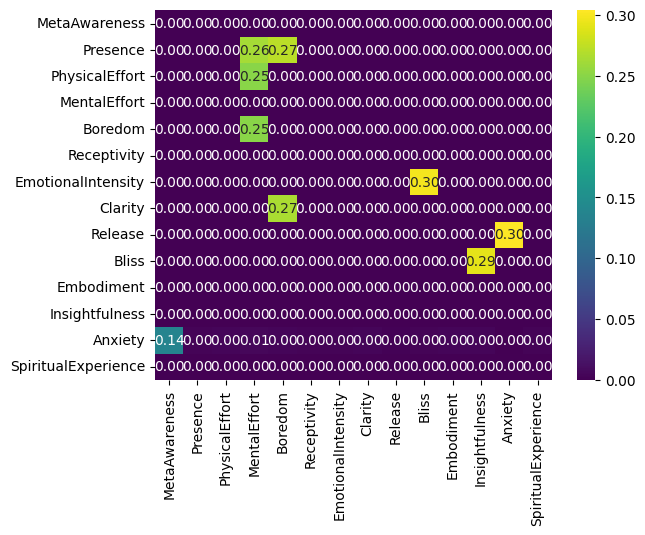

: 

In [48]:
te_matrix = np.zeros((len(feelings), len(feelings)))

for i, feeling in enumerate(feelings):
    for j, feeling_1 in enumerate(feelings):
        te_xy = transfer_entropy(data[feeling], data[feeling_1], k=20, local=False)
        te_matrix[i, j] = te_xy*1000


sns.heatmap(te_matrix, annot=True, fmt=".2f", cmap='viridis', xticklabels=feelings, yticklabels=feelings)


 

<Axes: >

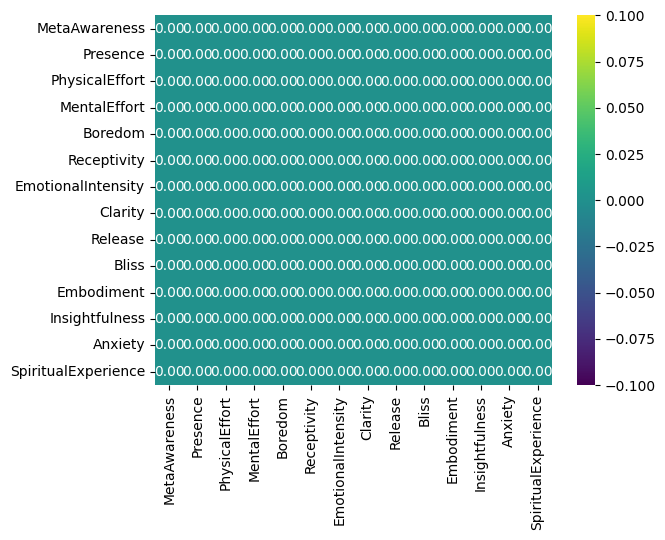

In [45]:
te_matrix = np.zeros((len(feelings), len(feelings)))

for i, feeling in enumerate(feelings_diffs):
    for j, feeling_1 in enumerate(feelings_diffs):
        te_xy = transfer_entropy(data[feeling], data[feeling_1], k=10, local=False)
        te_matrix[i, j] = te_xy

sns.heatmap(te_matrix, annot=True, fmt=".2f", cmap='viridis', xticklabels=feelings, yticklabels=feelings)

In [26]:
sum_of_squares = data[feelings_diffs].apply(lambda x: (x**2).sum(), axis=1)


0        0.002302
1        0.001900
2        0.002417
3        0.001837
4        0.001418
           ...   
23813    0.011924
23814    0.018172
23815    0.014045
23816    0.009756
23817    0.009128
Length: 23818, dtype: float64

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


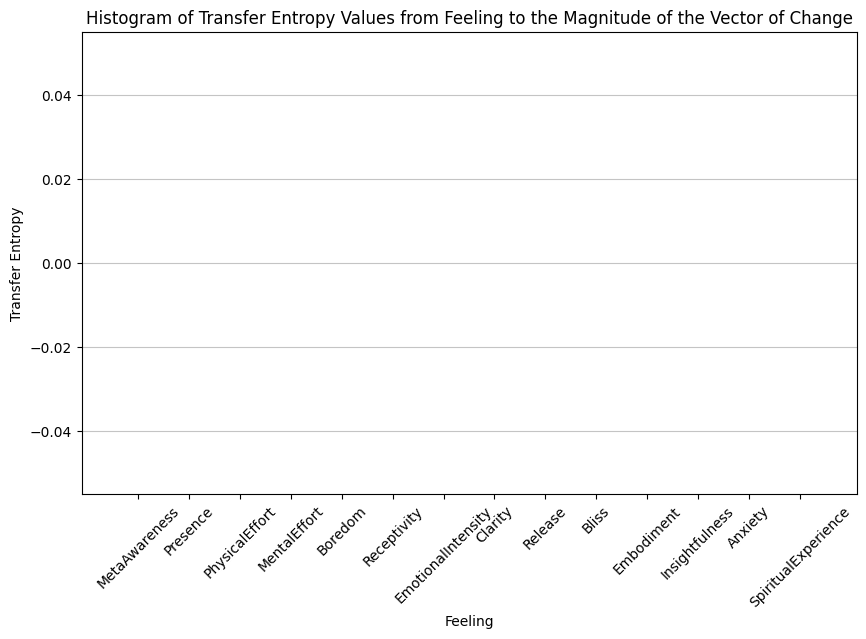

In [42]:
te_values = []

for feeling in feelings_diffs:
    te = transfer_entropy(data[feeling],sum_of_squares, k=5, local=False)
    print(te)
    te_values.append(te)


# Plotting the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(feelings, te_values, color='skyblue', width=0.85)
plt.title('Histogram of Transfer Entropy Values from Feeling to the Magnitude of the Vector of Change')
plt.xlabel('Feeling')
plt.ylabel('Transfer Entropy')
plt.xticks(rotation=45)  # Rotate the x-axis labels to make them readable if they are long
plt.grid(axis='y', alpha=0.75)

plt.show()


In [37]:
te_values

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]